---


1. Для начала мы скачаем датасет: [ADDI project](https://www.fc.up.pt/addi/ph2%20database.html).

<table><tr><td>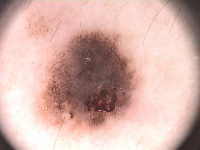</td><td>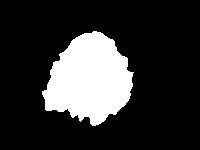</td></tr></table>

2. Разархивируем .rar файл.
3. Обратите внимание, что папка  `PH2 Dataset images` должна лежать там же где и ipynb notebook.

Это фотографии двух типов **поражений кожи:** меланома и родинки.
В данном примере мы не будем заниматься их классификацией, а будем **сегментировать** их.

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [1]:
images = []
lesions = []
from skimage.io import imread
import os
root = './'

for root, dirs, files in os.walk(root):
    print(os.walk(os.path.join(root, 'PH2 Dataset images')))
    print(root, dirs, files)
    if root.endswith('_Dermoscopic_Image'):
        print('_Dermoscopic_Image')
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        print('_lesion')
        lesions.append(imread(os.path.join(root, files[0])))

<generator object _walk at 0x7fb24bd0fe60>
./ ['.ipynb_checkpoints', 'PH2Dataset'] ['PH2Dataset.rar', 'prisyazhny-hw-basic-semantic-segmentation.ipynb', 'Prisyazhny__[hw,basic]semantic_segmentation_v2_.ipynb', 'Семантическая сегментация.ipynb']
<generator object _walk at 0x7fb24bd0fb50>
./.ipynb_checkpoints [] ['Семантическая сегментация-checkpoint.ipynb']
<generator object _walk at 0x7fb24bd0fb50>
./PH2Dataset ['PH2 Dataset images'] ['PH2_dataset.txt', 'PH2_dataset.xlsx', 'Readme.txt']
<generator object _walk at 0x7fb24bd0fa00>
./PH2Dataset/PH2 Dataset images ['IMD002', 'IMD003', 'IMD004', 'IMD006', 'IMD008', 'IMD009', 'IMD010', 'IMD013', 'IMD014', 'IMD015', 'IMD016', 'IMD017', 'IMD018', 'IMD019', 'IMD020', 'IMD021', 'IMD022', 'IMD023', 'IMD024', 'IMD025', 'IMD030', 'IMD031', 'IMD032', 'IMD033', 'IMD035', 'IMD036', 'IMD037', 'IMD038', 'IMD039', 'IMD040', 'IMD041', 'IMD042', 'IMD043', 'IMD044', 'IMD045', 'IMD047', 'IMD048', 'IMD049', 'IMD050', 'IMD057', 'IMD061', 'IMD063', 'IMD064', 'I

<generator object _walk at 0x7fb24bbb7f40>
./PH2Dataset/PH2 Dataset images/IMD017/IMD017_lesion [] ['IMD017_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7990>
./PH2Dataset/PH2 Dataset images/IMD017/IMD017_roi [] ['IMD017_R1_Label4.bmp', 'IMD017_R2_Label3.bmp']
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD018 ['IMD018_Dermoscopic_Image', 'IMD018_lesion', 'IMD018_roi'] []
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD018/IMD018_Dermoscopic_Image [] ['IMD018.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7a00>
./PH2Dataset/PH2 Dataset images/IMD018/IMD018_lesion [] ['IMD018_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7b50>
./PH2Dataset/PH2 Dataset images/IMD018/IMD018_roi [] []
<generator object _walk at 0x7fb24bbb7a00>
./PH2Dataset/PH2 Dataset images/IMD019 ['IMD019_Dermoscopic_Image', 'IMD019_lesion', 'IMD019_roi'] []
<generator object _walk at 0x7fb24bbb7a70>
./PH2Dataset/PH2 Data

<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD040/IMD040_lesion [] ['IMD040_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7f40>
./PH2Dataset/PH2 Dataset images/IMD040/IMD040_roi [] []
<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD041 ['IMD041_Dermoscopic_Image', 'IMD041_lesion', 'IMD041_roi'] []
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD041/IMD041_Dermoscopic_Image [] ['IMD041.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD041/IMD041_lesion [] ['IMD041_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD041/IMD041_roi [] []
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD042 ['IMD042_Dermoscopic_Image', 'IMD042_lesion', 'IMD042_roi'] []
<generator object _walk at 0x7fb24bbb40b0>
./PH2Dataset/PH2 Dataset images/IMD042/IMD042_Dermoscopic_Image [] 

<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD092/IMD092_lesion [] ['IMD092_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7f40>
./PH2Dataset/PH2 Dataset images/IMD092/IMD092_roi [] []
<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD101 ['IMD101_Dermoscopic_Image', 'IMD101_lesion', 'IMD101_roi'] []
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD101/IMD101_Dermoscopic_Image [] ['IMD101.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD101/IMD101_lesion [] ['IMD101_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD101/IMD101_roi [] []
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD103 ['IMD103_Dermoscopic_Image', 'IMD103_lesion', 'IMD103_roi'] []
<generator object _walk at 0x7fb24bbb7a00>
./PH2Dataset/PH2 Dataset images/IMD103/IMD103_Dermoscopic_Image [] 

<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD142/IMD142_lesion [] ['IMD142_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7df0>
./PH2Dataset/PH2 Dataset images/IMD142/IMD142_roi [] []
<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD143 ['IMD143_Dermoscopic_Image', 'IMD143_lesion', 'IMD143_roi'] []
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD143/IMD143_Dermoscopic_Image [] ['IMD143.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD143/IMD143_lesion [] ['IMD143_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD143/IMD143_roi [] []
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD144 ['IMD144_Dermoscopic_Image', 'IMD144_lesion', 'IMD144_roi'] []
<generator object _walk at 0x7fb24bbb7a00>
./PH2Dataset/PH2 Dataset images/IMD144/IMD144_Dermoscopic_Image [] 

<generator object _walk at 0x7fb24bbb7f40>
./PH2Dataset/PH2 Dataset images/IMD166/IMD166_lesion [] ['IMD166_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD166/IMD166_roi [] []
<generator object _walk at 0x7fb24bbb7f40>
./PH2Dataset/PH2 Dataset images/IMD168 ['IMD168_Dermoscopic_Image', 'IMD168_lesion', 'IMD168_roi'] []
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD168/IMD168_Dermoscopic_Image [] ['IMD168.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD168/IMD168_lesion [] ['IMD168_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD168/IMD168_roi [] []
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD169 ['IMD169_Dermoscopic_Image', 'IMD169_lesion', 'IMD169_roi'] []
<generator object _walk at 0x7fb24bbb7a00>
./PH2Dataset/PH2 Dataset images/IMD169/IMD169_Dermoscopic_Image [] 

<generator object _walk at 0x7fb24bbb7d80>
./PH2Dataset/PH2 Dataset images/IMD207/IMD207_roi [] []
<generator object _walk at 0x7fb24bbb7d80>
./PH2Dataset/PH2 Dataset images/IMD208 ['IMD208_Dermoscopic_Image', 'IMD208_lesion', 'IMD208_roi'] []
<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD208/IMD208_Dermoscopic_Image [] ['IMD208.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD208/IMD208_lesion [] ['IMD208_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD208/IMD208_roi [] []
<generator object _walk at 0x7fb24bbb7ed0>
./PH2Dataset/PH2 Dataset images/IMD210 ['IMD210_Dermoscopic_Image', 'IMD210_lesion', 'IMD210_roi'] []
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD210/IMD210_Dermoscopic_Image [] ['IMD210.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7a00>
./PH2Dataset/PH2 Dataset images/IMD210/IMD210_lesion

<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD120 ['IMD120_Dermoscopic_Image', 'IMD120_lesion', 'IMD120_roi'] []
<generator object _walk at 0x7fb24bbb40b0>
./PH2Dataset/PH2 Dataset images/IMD120/IMD120_Dermoscopic_Image [] ['IMD120.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD120/IMD120_lesion [] ['IMD120_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7ae0>
./PH2Dataset/PH2 Dataset images/IMD120/IMD120_roi [] []
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD155 ['IMD155_Dermoscopic_Image', 'IMD155_lesion', 'IMD155_roi'] []
<generator object _walk at 0x7fb24bbb7ca0>
./PH2Dataset/PH2 Dataset images/IMD155/IMD155_Dermoscopic_Image [] ['IMD155.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7b50>
./PH2Dataset/PH2 Dataset images/IMD155/IMD155_lesion [] ['IMD155_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7bc0>
./PH2Dataset/PH2 Datas

<generator object _walk at 0x7fb24bbb7e60>
./PH2Dataset/PH2 Dataset images/IMD365/IMD365_lesion [] ['IMD365_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7ae0>
./PH2Dataset/PH2 Dataset images/IMD365/IMD365_roi [] []
<generator object _walk at 0x7fb24bbb7920>
./PH2Dataset/PH2 Dataset images/IMD367 ['IMD367_Dermoscopic_Image', 'IMD367_lesion', 'IMD367_roi'] []
<generator object _walk at 0x7fb24bbb40b0>
./PH2Dataset/PH2 Dataset images/IMD367/IMD367_Dermoscopic_Image [] ['IMD367.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7b50>
./PH2Dataset/PH2 Dataset images/IMD367/IMD367_lesion [] ['IMD367_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7bc0>
./PH2Dataset/PH2 Dataset images/IMD367/IMD367_roi [] []
<generator object _walk at 0x7fb24bbb7b50>
./PH2Dataset/PH2 Dataset images/IMD368 ['IMD368_Dermoscopic_Image', 'IMD368_lesion', 'IMD368_roi'] []
<generator object _walk at 0x7fb24bbb7ca0>
./PH2Dataset/PH2 Dataset images/IMD368/IMD368_Dermoscopic_Image [] 

<generator object _walk at 0x7fb24bbb7df0>
./PH2Dataset/PH2 Dataset images/IMD393/IMD393_lesion [] ['IMD393_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7a00>
./PH2Dataset/PH2 Dataset images/IMD393/IMD393_roi [] []
<generator object _walk at 0x7fb24bbb7df0>
./PH2Dataset/PH2 Dataset images/IMD394 ['IMD394_Dermoscopic_Image', 'IMD394_lesion', 'IMD394_roi'] []
<generator object _walk at 0x7fb24bbb40b0>
./PH2Dataset/PH2 Dataset images/IMD394/IMD394_Dermoscopic_Image [] ['IMD394.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7b50>
./PH2Dataset/PH2 Dataset images/IMD394/IMD394_lesion [] ['IMD394_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7bc0>
./PH2Dataset/PH2 Dataset images/IMD394/IMD394_roi [] []
<generator object _walk at 0x7fb24bbb7b50>
./PH2Dataset/PH2 Dataset images/IMD395 ['IMD395_Dermoscopic_Image', 'IMD395_lesion', 'IMD395_roi'] []
<generator object _walk at 0x7fb24bbb7ca0>
./PH2Dataset/PH2 Dataset images/IMD395/IMD395_Dermoscopic_Image [] 

./PH2Dataset/PH2 Dataset images/IMD424 ['IMD424_Dermoscopic_Image', 'IMD424_lesion', 'IMD424_roi'] []
<generator object _walk at 0x7fb24bbb7ae0>
./PH2Dataset/PH2 Dataset images/IMD424/IMD424_Dermoscopic_Image [] ['IMD424.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD424/IMD424_lesion [] ['IMD424_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb40b0>
./PH2Dataset/PH2 Dataset images/IMD424/IMD424_roi [] []
<generator object _walk at 0x7fb24bbb4040>
./PH2Dataset/PH2 Dataset images/IMD425 ['IMD425_Dermoscopic_Image', 'IMD425_lesion', 'IMD425_roi'] []
<generator object _walk at 0x7fb24bbb7b50>
./PH2Dataset/PH2 Dataset images/IMD425/IMD425_Dermoscopic_Image [] ['IMD425.bmp']
_Dermoscopic_Image
<generator object _walk at 0x7fb24bbb7bc0>
./PH2Dataset/PH2 Dataset images/IMD425/IMD425_lesion [] ['IMD425_lesion.bmp']
_lesion
<generator object _walk at 0x7fb24bbb7ca0>
./PH2Dataset/PH2 Dataset images/IMD425/IMD425_roi [] []
<generato

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [2]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [3]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


In [4]:
len(lesions)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

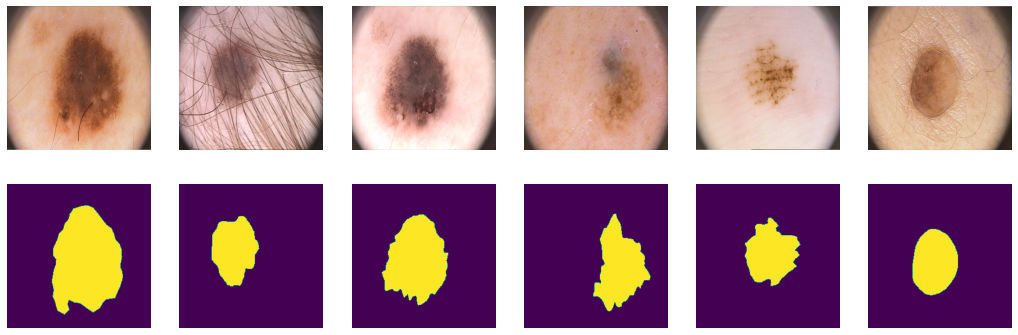

In [5]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50 для обучения, валидации и теста соответственно

In [6]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [7]:
print(len(tr), len(val), len(ts))

100 50 50


# PyTorch DataLoader

In [23]:
from torch.utils.data import DataLoader
batch_size = 15
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])), 
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

In [9]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Реализация различных архитектур:

Наш пример будет состоять из нескольких нейросетевых архитектур для решения задачи семантической сегментации. Мы будем сравнивать их по качеству на тесте и испробовать различные лосс функции для них.

-----------------------------------------------------------------------------------------

# SegNet [2 балла]

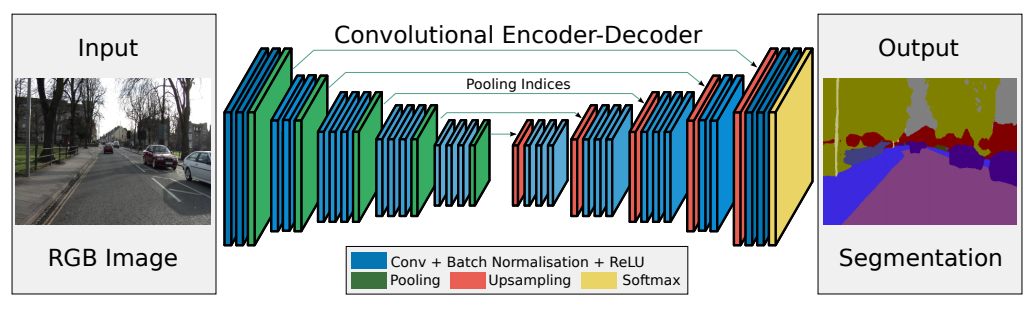

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрим из чего состоит модель и для чего выбраны те или иные блоки.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

In [11]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.pool0 = nn.MaxPool2d(kernel_size=2, return_indices=True)  # 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.pool1 =  nn.MaxPool2d(kernel_size=2, return_indices=True) # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.pool2 =  nn.MaxPool2d(kernel_size=2, return_indices=True) # 64 -> 32
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )
        self.pool3 =  nn.MaxPool2d(kernel_size=2, return_indices=True) # 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
            )

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(kernel_size=2) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.upsample1 = nn.MaxUnpool2d(kernel_size=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            )
        self.upsample2 = nn.MaxUnpool2d(kernel_size=2)  # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.upsample3 = nn.MaxUnpool2d(kernel_size=2)  # 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=1, kernel_size=3, padding=1),
            )

    def forward(self, x):
        # encoder
        e0, indices_e0 = self.pool0(self.enc_conv0(x))
        e1, indices_e1 = self.pool1(self.enc_conv1(e0))
        e2, indices_e2 = self.pool2(self.enc_conv2(e1))
        e3, indices_e3 = self.pool3(self.enc_conv3(e2))

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(self.upsample0(b, indices_e3))
        d1 = self.dec_conv1(self.upsample1(d0, indices_e2))
        d2 = self.dec_conv2(self.upsample2(d1, indices_e1))
        d3 = self.dec_conv3(self.upsample3(d2, indices_e0))  # no activation
        
        return d3

## Метрика

В данном примере будем использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.

Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [12]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1).byte() # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    
    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds
    
    return thresholded  # 

## Функция потерь

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации. 

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [13]:
def bce_loss(y_real, y_pred):
    # TODO 
    # please don't use nn.BCELoss. write it from scratch
    y_pred = torch.sigmoid(y_pred)
    bce = (y_pred - y_real * y_pred + torch.log(1 + torch.exp( - y_pred))).mean()
    return bce

## Тренировка

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

Для наглядности нашего обучения сделаем вывод графика нашего loss

In [14]:
def plot_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    axes[0].plot(history['epoch'], history['train_loss'], label='train_loss')
    axes[0].plot(history['epoch'], history['val_loss'], label='val_loss')
    axes[1].plot(history['epoch'], history['val_score'], label='val_score')
    for i in [0,1]:
        axes[i].legend()

In [15]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    history = {'epoch':[],'train_loss':[],'val_loss':[],'val_score':[]}
    X_val, Y_val = next(iter(data_val))
    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))
        avg_loss = 0
        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            # data to device
            X_batch = X_batch.cuda()
            Y_batch = Y_batch.cuda()
            # set parameter gradients to zero
            opt.zero_grad()
            # forward
            Y_pred = model(X_batch)
            loss =  loss_fn(Y_batch, Y_pred) # forward-pass
            loss.backward()  # backward-pass
            opt.step() # update weights
  
            # calculate loss to show the user
            avg_loss += loss / len(data_tr)

        toc = time()
        print('loss: %f' % avg_loss)
        
        

        # show intermediate results
        model.eval()
        Y_hat = model(X_val.to(device)).detach().cpu() # detach and put into cpu
        val_score = iou_pytorch(Y_val, Y_hat > 0.5).mean()
        val_loss = loss_fn(Y_val, Y_hat)

        history['epoch'].append(epoch)
        history['train_loss'].append(avg_loss.item())
        history['val_loss'].append(val_loss.item())
        history['val_score'].append(val_score.item())
        # Visualize tools
        clear_output(wait=True)
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, avg_loss))
        plt.show()

    plot_history(history) # Выведем график нашего loss

## Инференс

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [16]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = [ X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [17]:
def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = (model(X_batch.to(device)) > 0.5).int()
        scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

## Основной момент: обучение

Обучим нашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.

Без очистки памяти gpu никуда...:)

In [26]:
import gc
torch.cuda.empty_cache()
gc.collect()

34690

In [27]:
model = SegNet().to(device)

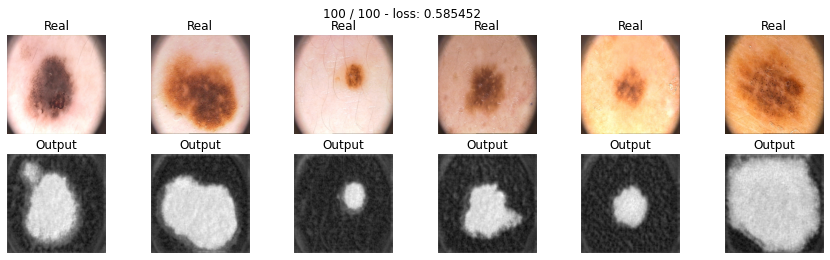

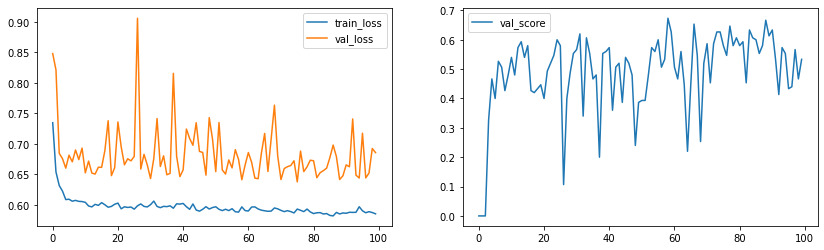

In [28]:
max_epochs = 100
optimazer = torch.optim.Adam(model.parameters())
train(model, optimazer, bce_loss, max_epochs, data_tr, data_val)

In [29]:
score_model(model, iou_pytorch, data_val)

0.6650000512599945

Модель не переобучается, но до идеала далеко...

-----------------------------------------------------------------------------------------

## Дополнительные функции потерь

В данном разделе нам потребуется имплементировать две функции потерь:
DICE и Focal loss. 
Если у вас что-то не учится, велика вероятность, что вы ошиблись или учите слишком мало эпох, прежде чем бить тревогу попробуйте перебрать различные варианты и убедитесь, что во всех других сетапах сеть достигает желанного результата. СПОЙЛЕР: учиться она будет при всех лоссах, предложенных в этом примере.

**1. Dice coefficient:** Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \frac{\sum_i 2X_iY_i}{\sum_i(X_i+Y_i)}.$$

Не забудьте подумать о численной нестабильности, возникающей в математической формуле.

In [30]:
def dice_loss(y_real, y_pred):
    num = (torch.sigmoid(y_pred)).view(-1)
    den =  y_real.view(-1)
    res = 1 - (2. * (num * den).sum() + 1e-7)/(num.sum() + den.sum() + 1e-7)
    return res 

И опять без очистки памяти никуда:)

In [31]:
torch.cuda.empty_cache()
gc.collect()

34538

Проводим тестирование:

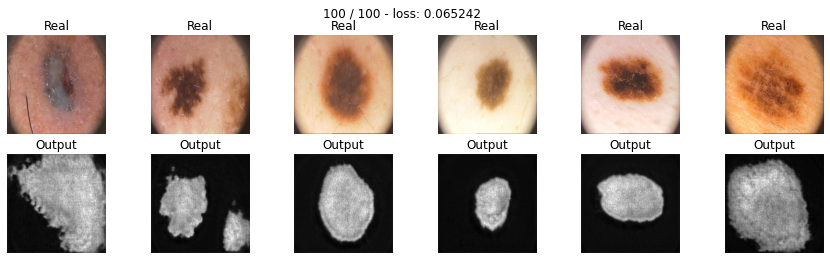

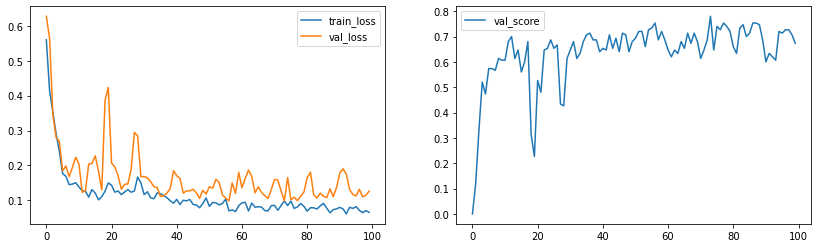

In [32]:
model_dice = SegNet().to(device)

max_epochs = 100
optimazer = torch.optim.Adam(model_dice.parameters())
train(model_dice, optimazer, dice_loss, max_epochs, data_tr, data_val)

In [33]:
score_model(model_dice, iou_pytorch, data_val)

0.6950000375509262

[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf) 

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [34]:
def focal_loss(y_real, y_pred, eps = 1e-8, gamma = 2):

    y_pred =  (torch.sigmoid(y_pred)).view(-1)
    y_real = y_real.view(-1)
    BCE = F.binary_cross_entropy(y_pred, y_real, reduction = 'mean')
    BCE_exp = torch.exp(- BCE)
    your_loss = (1 - BCE_exp)**gamma * BCE
    
    return your_loss

И опять чистим память

In [38]:
torch.cuda.empty_cache()
gc.collect()

34461

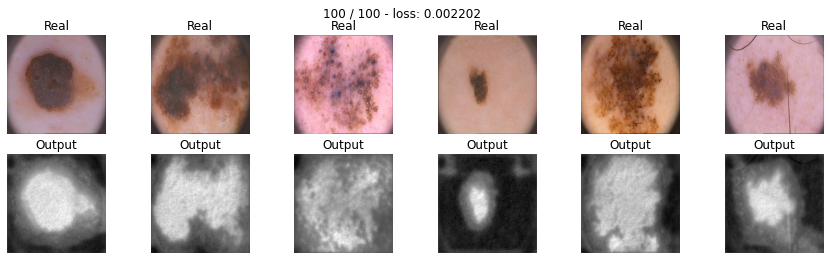

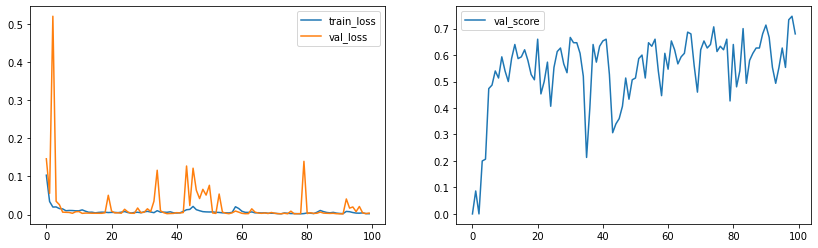

In [36]:
model_focal = SegNet().to(device)

max_epochs = 100
optimazer = torch.optim.Adam(model_focal.parameters())
train(model_focal, optimazer, focal_loss, max_epochs, data_tr, data_val)

In [37]:
score_model(model_focal, iou_pytorch, data_val)

0.6100000441074371

-----------------------------------------------------------------------------------------

# U-Net

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

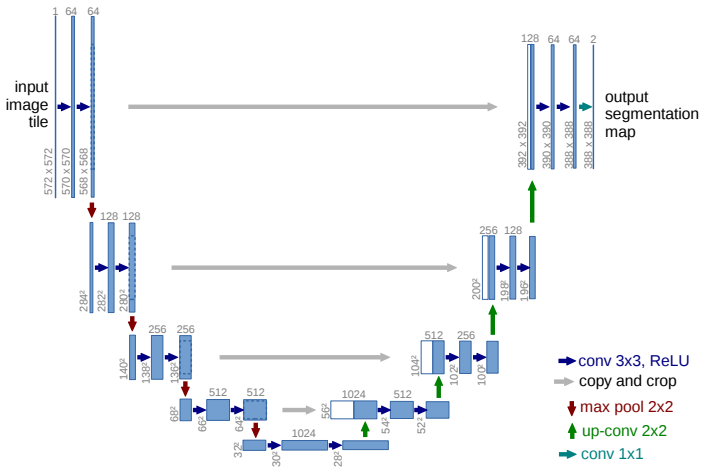

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [39]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.pool0 =  nn.MaxPool2d(kernel_size=2, return_indices=True) # 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.pool1 =  nn.MaxPool2d(kernel_size=2, return_indices=True) # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.pool2 = nn.MaxPool2d(kernel_size=2, return_indices=True) # 64 -> 32
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )
        self.pool3 = nn.MaxPool2d(kernel_size=2, return_indices=True) # 32 -> 16
        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )
        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(kernel_size=2)# 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            )
        self.upsample1 = nn.MaxUnpool2d(kernel_size=2)# 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
            )
        self.upsample2 = nn.MaxUnpool2d(kernel_size=2)# 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
            )
        self.upsample3 = nn.MaxUnpool2d(kernel_size=2)# 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1),
            )
    def forward(self, x):
        # encoder
        enc0 = self.enc_conv0(x)
        pool0, indices_e0 = self.pool0(enc0)
        enc1 = self.enc_conv1(pool0)
        pool1, indices_e1 = self.pool1(enc1)
        enc2 = self.enc_conv2(pool1)
        pool2, indices_e2 = self.pool2(enc2)
        enc3 = self.enc_conv3(pool2)
        pool3, indices_e3 = self.pool3(enc3)
        # bottleneck
        b = self.bottleneck_conv(pool3)
        # decoder
        d0 = self.dec_conv0(torch.cat((self.upsample0(b, indices_e3), enc3), dim=1))
        d1 = self.dec_conv1(torch.cat((self.upsample1(d0, indices_e2), enc2), dim=1))
        d2 = self.dec_conv2(torch.cat((self.upsample2(d1, indices_e1), enc1), dim=1))
        d3 = self.dec_conv3(torch.cat((self.upsample3(d2, indices_e0), enc0), dim=1)) # no activation
        return d3

In [40]:
unet_model_bce = UNet().to(device)

Снова почистим память

In [52]:
torch.cuda.empty_cache()
gc.collect()

64

In [53]:
batch_size = 6
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])), 
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

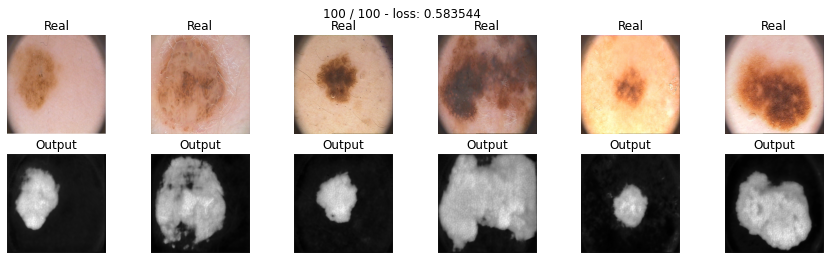

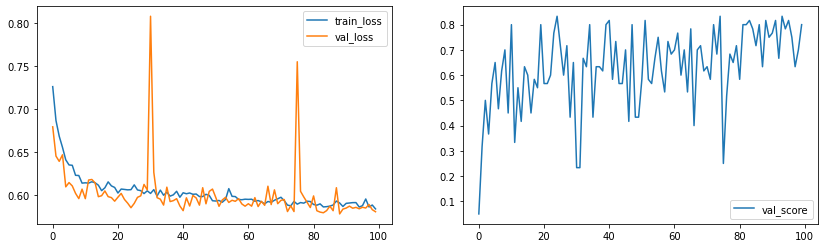

In [54]:
train(unet_model_bce, torch.optim.Adam(unet_model_bce.parameters()), bce_loss, 100, data_tr, data_val)

In [55]:
score_model(unet_model_bce, iou_pytorch, data_val)

0.7222222354676988

Теперь проверим модель UNet c функцией потерь FocalLoss.

In [56]:
torch.cuda.empty_cache()
gc.collect()

34384

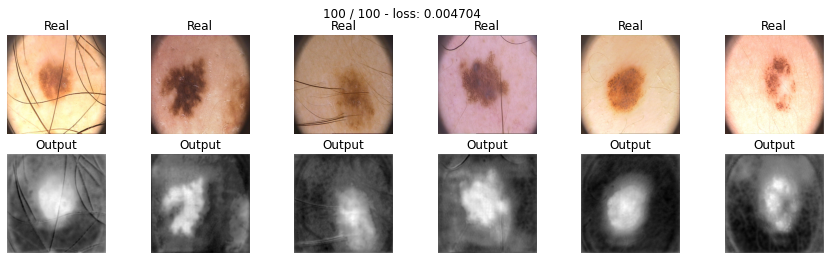

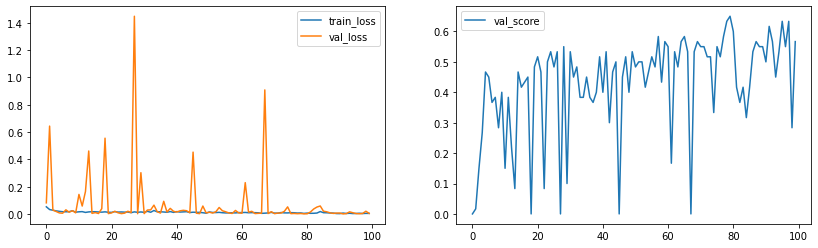

In [57]:
unet_focal_loss = UNet().to(device)
train(unet_focal_loss, torch.optim.Adam(unet_focal_loss.parameters()), focal_loss, 100, data_tr, data_val)

In [58]:
score_model(unet_focal_loss, iou_pytorch, data_val)

0.6370370520485772

А не потренировать ли нам эту модель с DiceLoss?

In [59]:
torch.cuda.empty_cache()
gc.collect()

34538

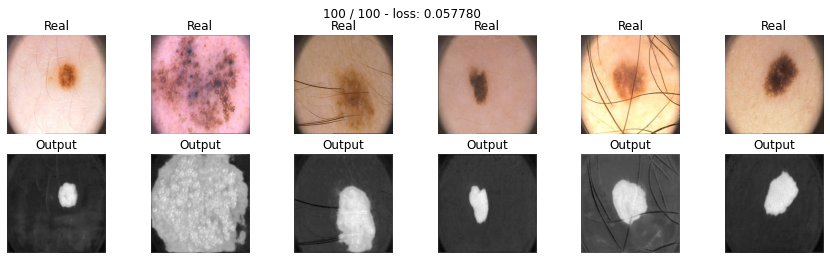

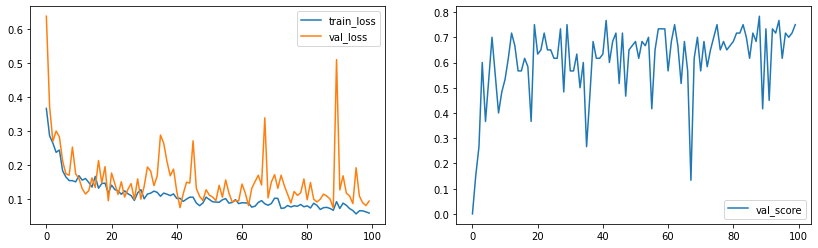

In [60]:
unet_model_dice = UNet().to(device)
train(unet_model_dice, torch.optim.Adam(unet_model_dice.parameters()), dice_loss, 100, data_tr, data_val)

In [61]:
score_model(unet_model_dice, iou_pytorch, data_val)

0.7092592914899191

<b>Что мы имеем?</b>

SegNet с BCELoss - 0.6650000512599945

SegNet c DiceLoss - 0.6950000375509262

SegNet c FocalLoss - 0.6100000441074371

UNet c BCELoss - 0.7222222354676988

UNet c DiceLoss - 0.7092592914899191

UNet c FocalLoss - 0.6370370520485772

<b>Получается, что у меня лучше сработала модель UNet с функцией потерь BCELoss</b>